In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/00_raw_data"

In [4]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1
3,파란색 크롭 셔츠,봄가을,2023,상의,1,1,0,스카이블루,4,1,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격,1
4,숏 트렌치 코트,봄가을,2023,겉옷,0,1,1,베이지,16,1,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격,1


In [5]:
df.shape

(150, 20)

In [6]:
df['성공점수'].mean()

3.2177777777599985

In [7]:
df['성공점수'].median()

3.333333333

In [8]:
df['색상그룹'].mode()

0    블루 계열
Name: 색상그룹, dtype: object

<AxesSubplot:>

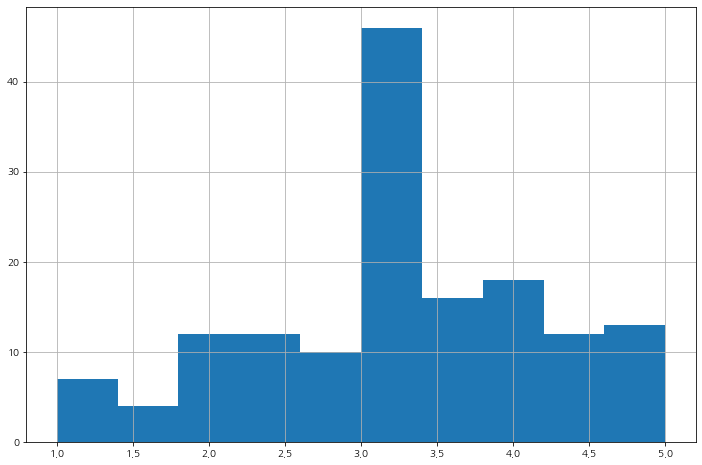

In [9]:
df['성공점수'].hist(bins=10, figsize=(12,8))

In [15]:
import pingouin as pg

In [16]:
# 신뢰 구간 구하기

pg.ttest(df["성공점수"], 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,41.591792,149,two-sided,6.749313e-84,"[3.06, 3.37]",3.395956,1.379e+80,1.0


In [17]:
import scipy #numpy랑 같이 불러오기
scipy.stats.bootstrap([df['성공점수']], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0644444444171155, high=3.366666666676874), standard_error=0.07722662980765108)

In [18]:
scipy.stats.bootstrap([df['성공점수']], np.median, confidence_level=0.99)

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.703485214594122, high=3.333333333), standard_error=0.1310263162495252)

## 정규성 검정
1. probplot (QQ-plot)
   참고링크:https://bongury.tistory.com/377
2. Kolmogorov-Smirnov Test
- 귀무가설은 정규분포를 따른다. p-value가 0.05이상인 경우 귀무가설을 기각할 수 없다.
   참고링크: https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222339451767&redirect=Dlog&widgetTypeCall=true&directAccess=false
   


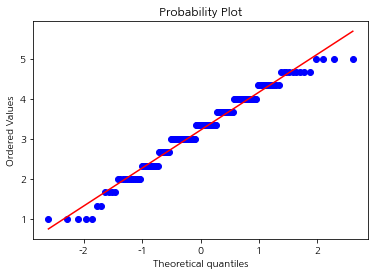

In [19]:
from scipy.stats import probplot

plt.figure()
probplot(df["성공점수"], plot=plt)
plt.show()

In [20]:
from scipy import stats
test_stat, p_val = stats.kstest(df["성공점수"], 'norm', args=(df["성공점수"].mean(), df["성공점수"].var()**0.5))
print("Test-statistics : {}, p-value:{}".format(test_stat, p_val))

Test-statistics : 0.10910930409593844, p-value:0.05205518728014469


In [21]:
from scipy import stats
test_stat, p_val = stats.shapiro(df["성공점수"])
print("Test-statistics : {}, p-value:{}".format(test_stat, p_val))

Test-statistics : 0.9722031354904175, p-value:0.003894209396094084


<AxesSubplot:xlabel='가격', ylabel='성공점수'>

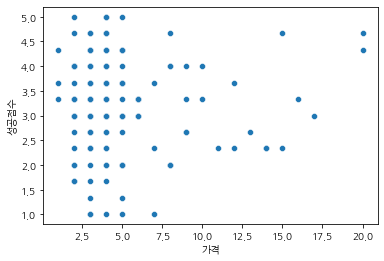

In [24]:
sns.scatterplot(x='가격', y='성공점수', data=df)

In [25]:
pg.corr(df['가격'], df['성공점수']) #표본상관계수 r값

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.002021,"[-0.16, 0.16]",0.980416,0.102,0.049963


In [26]:
from statsmodels.formula.api import ols

In [35]:
# p < a - 통계적으로 유의한 차이가 있다("두 집단의 평균이 다르다") (a=0.05)

In [40]:
#카테고리별로 확인해보기
df_b = df[df['카테고리'] == '하의']

In [38]:
# 바지는 입어보고 구매해야 성공 확률이 높다.
try_yes = df_b['성공점수'][df_b["구매 전 착용 여부"] == 1]
try_no = df_b['성공점수'][df_b["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.986901,24.380236,two-sided,0.333385,"[-0.44, 1.24]",0.374504,0.511,0.15685


In [31]:
try_yes = df['성공점수'][df["유행 여부"] == 1]
try_no = df['성공점수'][df["유행 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.130928,35.859071,two-sided,0.265593,"[-0.71, 0.2]",0.267705,0.385,0.245491


In [41]:
try_yes = df['성공점수'][df["브랜드 여부"] == 1]
try_no = df['성공점수'][df["브랜드 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.156603,12,two-sided,0.269941,"[-0.55, 1.79]",0.61823,0.685,0.186843


In [36]:
try_yes = df['성공점수'][df["구매처"] == 1]
try_no = df['성공점수'][df["구매처"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380194,52.782408,two-sided,0.705327,"[-0.46, 0.31]",0.076696,0.218,0.068032
